# 1. Сборный проект


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

Цель проекта - показать потенциально прибыльные платформы и жанры, исходя из данных продаж за разные годы. Мы будем анализировать данные по различным платформам, используя сводные таблицы, графики и статистические функции.

Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

In [1]:
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as plt
from scipy import stats as st

pd.options.display.max_columns = None

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')


In [3]:
print(df.info())
print(df.columns)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN




В столбцах Genre, Year_of_Release,  Name есть пропуски.
В столбцах Critic_Score, User_Score, Rating есть  существенные пропуски.  
В названиях столбцов есть строчные символы. 

Причины этого могут быть разные, сложно сейчас предположить, например, малоизвестные тайтлы без оценок. Попробуем разобраться в причинах в разделе исправления данных, при просмотре группировок по количеству различных данных.

Исправляем ниже в разделе исправления данных.

## Шаг 2. Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру);

In [4]:
df.rename(columns = {key:key.lower() for (key) in df.columns}, inplace=True)

print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [5]:
# посмотрим более детально на то, какие данные содержатся в каждом из столбцов данных
for col in df.columns:
    if not "sales" in col:
        print('---------------------------------'+col+'-----------------------------------------')

        print(df.groupby([col], dropna=False, as_index=False).size())

---------------------------------name-----------------------------------------
                               name  size
0                    Beyblade Burst     1
1                 Fire Emblem Fates     1
2              Frozen: Olaf's Quest     2
3        Haikyu!! Cross Team Match!     1
4                 Tales of Xillia 2     1
...                             ...   ...
11555                  uDraw Studio     1
11556  uDraw Studio: Instant Artist     2
11557    wwe Smackdown vs. Raw 2006     1
11558  ¡Shin Chan Flipa en colores!     1
11559                           NaN     2

[11560 rows x 2 columns]
---------------------------------platform-----------------------------------------
   platform  size
0      2600   133
1       3DO     3
2       3DS   520
3        DC    52
4        DS  2151
5        GB    98
6       GBA   822
7        GC   556
8       GEN    29
9        GG     1
10      N64   319
11      NES    98
12       NG    12
13       PC   974
14     PCFX     1
15       PS  1197
16

В столбце name есть два пропуска.
Посмотрим на них более внимательно далее, возможно данных там нет и можно просто удалить эти строки.

В столбце platform нет пропусков.

В столбце year_of_release есть  пропуски.

В столбце genre есть  пропуски. Возможно это те две игры, с пустыми названиями.

В столбце critic_score много пропусков. Позже, нам придётся учитывать рейтинги с категоризацией по региону. 

В столбце user_score много пропусков. Позже, нам придётся учитывать рейтинги с категоризацией по региону. 

В  столбце rating много пропусков. К сожалению, нам неоткуда взять присвоенный игре рейтинг, поэтому придётся установить заглушку и учесть её при использовании этого столбца.


### Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам;

Пройдем по найденным некорректным значениям и попробуем исправить.

#### В столбце name есть два пропуска.

 В столбце name есть два пропуска.
Посмотрим на них более внимательно далее, возможно данных там нет и можно просто удалить эти строки.

In [6]:

df[df['name'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как эти игры не могут участвовать в данных по рейтингам, а количество продаж незначительное и не повлияет существенно на данные о продажах по регионам становится возможно удалить эти строки.

In [7]:
df = df[df['name'].notna()]

#### В столбце year_of_release есть  пропуски.

 допустимо удалить строки с отсутствующим годом

In [8]:
df = df[df['year_of_release'].notna()]


#### В столбце genre есть  пропуски. Возможно это те две игры, с пустыми названиями. 

проверим, остались ли они:

In [9]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


пропусков нет в этом столбце!

#### В столбце critic_score много пропусков.

Проставим там заглушку, которую придётся учесть в выборках, где участвует этот столбец.

In [10]:

df['critic_score'] = df['critic_score'].fillna(-999)

#### В столбце user_score много пропусков.

роставим там заглушку, которую придётся учесть в выборках, где участвует этот столбец.

In [11]:
#
df['user_score'] = df['user_score'].fillna(-999)

#### В столбце rating много пропусков.

К сожалению, нам неоткуда взять присвоенный игре рейтинг, поэтому придётся установитьз аглушку и учесть её при использовании этого столбца.

In [12]:
# 
# 
df['rating'] = df['rating'].fillna('WITHOUT_RATE')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это  начение и опишите, как его обработать;

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

придётся установитьз аглушку и учесть её при использовании этого столбца.

In [14]:
df['user_score'].replace(['tbd'], '-999', inplace = True)

In [15]:
df['user_score'] = df['user_score'].astype(float)
df['user_score'].value_counts()

-999.0    8981
 7.8       322
 8.0       285
 8.2       276
 8.3       252
          ... 
 0.7         2
 1.0         2
 0.2         2
 9.7         1
 0.0         1
Name: user_score, Length: 96, dtype: int64


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Посчитайте суммарные продажи во всех регионах

In [16]:
def all_regions(row):
    all_sum_row = 0
    for col in df.columns:
       
        if "sales" in col:
            all_sum_row +=row[col]
    return  all_sum_row 

In [17]:

df['all_regions_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df['all_regions_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: all_regions_sales, Length: 16444, dtype: float64

In [18]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-999.0,-999.0,WITHOUT_RATE,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-999.0,WITHOUT_RATE,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-999.0,-999.0,WITHOUT_RATE,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-999.0,-999.0,WITHOUT_RATE,28.31


## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:xlabel='year_of_release'>

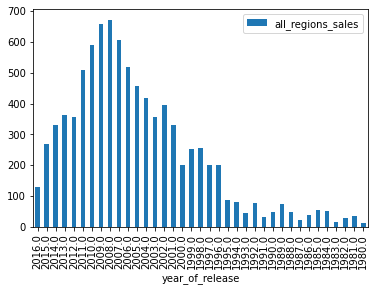

In [19]:
df.pivot_table(index = 'year_of_release', values = 'all_regions_sales', aggfunc='sum').sort_values(by ='year_of_release', ascending=False).plot(kind='bar')

посмотрим по годам

In [20]:
df.pivot_table(index = 'year_of_release', values = 'all_regions_sales', aggfunc='count').sort_values(by ='all_regions_sales', ascending=False)

,all_regions_sales
year_of_release,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

Посмотрите, как менялись продажи по платформам

In [21]:
df.pivot_table(index = 'platform', values = 'all_regions_sales', aggfunc='sum').sort_values(by ='all_regions_sales', ascending=False)

,all_regions_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [22]:
best_sales_platform=['PS2','X360','PS3','Wii','DS','PS','PS4']


In [23]:
all_best_sales_platform=['PCFX','3DO','TG16','NG','WS','DC','SAT','SNES','PSV',
                         'WiiU','GB','XOne','GC','N64','PC','XB','3DS','PSP',
                         'GBA','PS4','PS','DS','Wii','PS3','X360','PS2']


подготовим данные для графика по годам

In [24]:
# 
sales_best_year=df.query('platform in @best_sales_platform').pivot_table\
(index='year_of_release', columns='platform',aggfunc = 'count')['all_regions_sales'].fillna(0)

построим график продаж по годам

In [ ]:
#
sales_best_year.plot( figsize = (15,5),stacked=False)

In [ ]:
<div class="alert alert-success">
<b>Комментарий ревьюера V1✔️:</b>
    
Так можно сделать комментарий с похвалой.

</div>

### За какой характерный срок появляются новые и исчезают старые платформы?

Срок существования платформ "долгожителей" примерно 6 лет, однако нам нет необходимости рассматривать столь длительный период, достаточно будет данных за 2 года.


подготовим данные для графика

In [26]:
# 
df.query('platform in @best_sales_platform & year_of_release>2010').pivot_table(index='year_of_release', columns='platform',aggfunc = 'count')


all_regions_sales                                   \
platform                       DS  PS2    PS3    PS4    Wii   X360   
year_of_release                                                      
2011.0                      153.0  7.0  215.0    NaN  143.0  206.0   
2012.0                       23.0  NaN  148.0    NaN   31.0  106.0   
2013.0                        8.0  NaN  126.0   16.0   12.0   75.0   
2014.0                        NaN  NaN  108.0   75.0    6.0   63.0   
2015.0                        NaN  NaN   73.0  137.0    4.0   35.0   
2016.0                        NaN  NaN   38.0  164.0    1.0   13.0   

                critic_score                                  eu_sales       \
platform                  DS  PS2    PS3    PS4    Wii   X360       DS  PS2   
year_of_release                                                               
2011.0                 153.0  7.0  215.0    NaN  143.0  206.0    153.0  7.0   
2012.0                  23.0  NaN  148.0    NaN   31.0  106.0     23.0  NaN   
2013.0                   8.0  NaN  126.0   16.0   12.0   75.0      8.0  NaN   
2014.0                   NaN  NaN  108.0   75.0    6.0   63.0      NaN  NaN   
2015.0                   NaN  NaN   73.0  137.0    4.0   35.0      NaN  NaN   
2016.0                   NaN  NaN   38.0  164.0    1.0   13.0      NaN  NaN   

                                             genre                            \
platform           PS3    PS4    Wii   X360     DS  PS2    PS3    PS4    Wii   
year_of_release                                                                
2011.0           215.0    NaN  143.0  206.0  153.0  7.0  215.0    NaN  143.0   
2012.0           148.0    NaN   31.0  106.0   23.0  NaN  148.0    NaN   31.0   
2013.0           126.0   16.0   12.0   75.0    8.0  NaN  126.0   16.0   12.0   
2014.0           108.0   75.0    6.0   63.0    NaN  NaN  108.0   75.0    6.0   
2015.0            73.0  137.0    4.0   35.0    NaN  NaN   73.0  137.0    4.0   
2016.0            38.0  164.0    1.0   13.0    NaN  NaN   38.0  164.0    1.0   

                       jp_sales                                  na_sales  \
platform          X360       DS  PS2    PS3    PS4    Wii   X360       DS   
year_of_release                                                             
2011.0           206.0    153.0  7.0  215.0    NaN  143.0  206.0    153.0   
2012.0           106.0     23.0  NaN  148.0    NaN   31.0  106.0     23.0   
2013.0            75.0      8.0  NaN  126.0   16.0   12.0   75.0      8.0   
2014.0            63.0      NaN  NaN  108.0   75.0    6.0   63.0      NaN   
2015.0            35.0      NaN  NaN   73.0  137.0    4.0   35.0      NaN   
2016.0            13.0      NaN  NaN   38.0  164.0    1.0   13.0      NaN   

                                                   name                     \
platform         PS2    PS3    PS4    Wii   X360     DS  PS2    PS3    PS4   
year_of_release                                                              
2011.0           7.0  215.0    NaN  143.0  206.0  153.0  7.0  215.0    NaN   
2012.0           NaN  148.0    NaN   31.0  106.0   23.0  NaN  148.0    NaN   
2013.0           NaN  126.0   16.0   12.0   75.0    8.0  NaN  126.0   16.0   
2014.0           NaN  108.0   75.0    6.0   63.0    NaN  NaN  108.0   75.0   
2015.0           NaN   73.0  137.0    4.0   35.0    NaN  NaN   73.0  137.0   
2016.0           NaN   38.0  164.0    1.0   13.0    NaN  NaN   38.0  164.0   

                              other_sales                                   \
platform           Wii   X360          DS  PS2    PS3    PS4    Wii   X360   
year_of_release                                                              
2011.0           143.0  206.0       153.0  7.0  215.0    NaN  143.0  206.0   
2012.0            31.0  106.0        23.0  NaN  148.0    NaN   31.0  106.0   
2013.0            12.0   75.0         8.0  NaN  126.0   16.0   12.0   75.0   
2014.0             6.0   63.0         NaN  NaN  108.0   75.0    6.0   63.0   
2015.0   

построим график

<AxesSubplot:xlabel='year_of_release'>

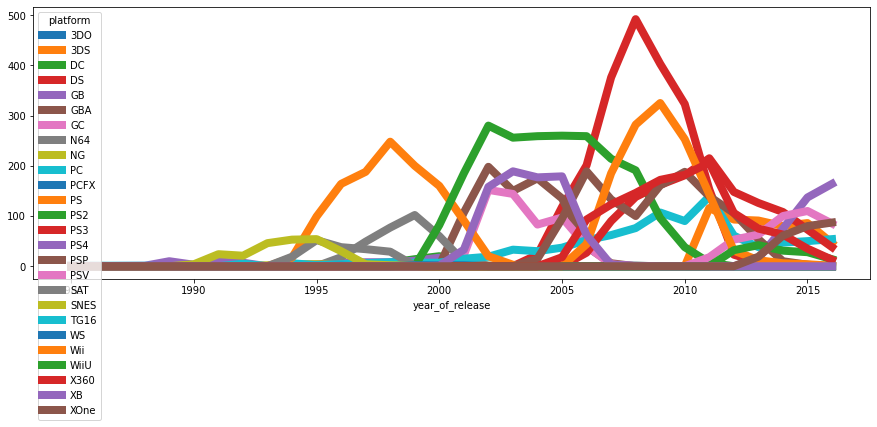

In [27]:
df.query('platform in @all_best_sales_platform').pivot_table(index='year_of_release', columns='platform',aggfunc = 'count')['all_regions_sales'].fillna(0).plot(linewidth=8,figsize = (15,5),stacked=False)

построим график продаж по годам используем series.pct_change() для сравнения с предыдущим периодом. В таблице представлены данные по перспективным платформам с числовыми показателями динамики за соответствующий год. Отрицательное число означает количество в процентах на сколько упали продажи по сравнению с предыдущим годом. Положительное число - показывает прирост продаж по сравнению с предыдущим годом.

In [28]:
# 
# 

q=df.value_counts('platform').index.tolist()
observable_series = None
for p in q:

    plat_list = [p]

    observable_series = df.query('platform in @plat_list & year_of_release>2013').\
    pivot_table(index='year_of_release', values='all_regions_sales', aggfunc = 'count')
    r=observable_series.pct_change().mul(100).round(2) 
    if (len(r)>0):
        print('\n',p,r)




 PS3                  all_regions_sales
year_of_release                   
2014.0                         NaN
2015.0                      -32.41
2016.0                      -47.95

 Wii                  all_regions_sales
year_of_release                   
2014.0                         NaN
2015.0                      -33.33
2016.0                      -75.00

 X360                  all_regions_sales
year_of_release                   
2014.0                         NaN
2015.0                      -44.44
2016.0                      -62.86

 PSP                  all_regions_sales
year_of_release                   
2014.0                         NaN
2015.0                       -70.0

 PC                  all_regions_sales
year_of_release                   
2014.0                         NaN
2015.0                        6.38
2016.0                        8.00

 3DS                  all_regions_sales
year_of_release                   
2014.0                         NaN
2015.0             

Исходя из графиков, потенциально прибыльные платформы -  PS4 XOne PC.
Расположены в порядке убывания потенциала, посчитанного на основе процента продаж предыдущих периодов.


In [29]:
df.drop(df[df.year_of_release<2015].index, inplace= True)

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

остроим график «ящик с усами» по глобальным продажам игр в разбивке по платформам используем для этого boxplot

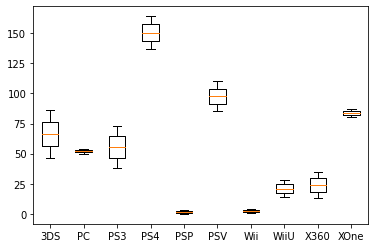

In [30]:
# 
# 


group_sales_platform = df.query('platform in @all_best_sales_platform & year_of_release>2013').pivot_table(index='year_of_release', columns='platform',aggfunc = 'count')['all_regions_sales'].fillna(0)
fig, ax = plt.subplots()
ax.boxplot(group_sales_platform)
ax.set_xticklabels(group_sales_platform.columns)
plt.show()





мы видим что среди лидеров по охвату рынка PS4, PSP, XBOX One. Их медианные значения продаж и диапазон  квартилей иногда значительно превосходит остальные.

2015-2016

### PS4 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.  Сформулируйте выводы.

Выберем для исследования платформу PS4

#### user_score

учтем при отборе заглушки которые установили ранее

In [31]:

ps4_rates_sales = df.query('platform=="PS4" & critic_score!=-999.0 & user_score!=-999.0')[['all_regions_sales','user_score']]
ps4_rates_sales.corr()

,all_regions_sales,user_score
all_regions_sales,1.000000,-0.064368
user_score,-0.064368,1.000000


продажи от оценок пользователей не зависят

построим график, показывающий зависимость количества проданных копий игр от оценок пользователей

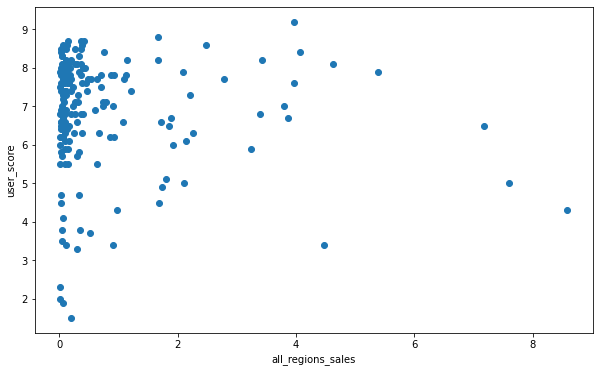

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x =  ps4_rates_sales['all_regions_sales'], y = ps4_rates_sales['user_score'])
plt.xlabel("all_regions_sales")
plt.ylabel("user_score")
plt.show()

продажи от оценок пользователей не зависят,что подтверждает этот график.

#### critic_score

In [33]:
df.query('platform=="PS4"')['year_of_release'].unique()

array([2015., 2016.])

учтем при отборе заглушки которые установили ранее

In [34]:

ps4_rates_sales = df.query('platform=="PS4" & critic_score!=-999.0 & user_score!=-999.0')[['all_regions_sales','critic_score']]
ps4_rates_sales.corr()



,all_regions_sales,critic_score
all_regions_sales,1.000000,0.392074
critic_score,0.392074,1.000000


Отзывы критиков влияют гораздо сильнее на продажи. Именно поэтому, часто игры выдают для составления обзоров критикам на этапе завершения.

построим график, показывающий зависимость количества проданных копий игр от оценок

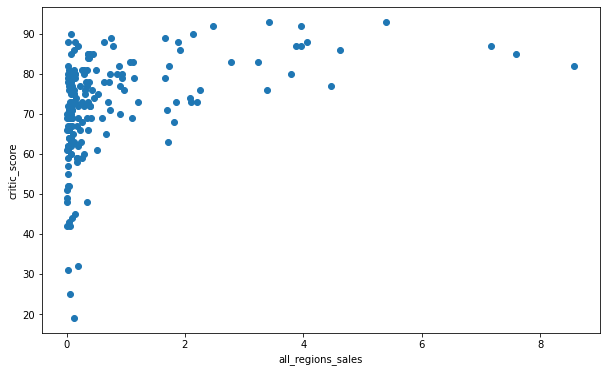

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x =  ps4_rates_sales['all_regions_sales'], y = ps4_rates_sales['critic_score'])
plt.xlabel("all_regions_sales")
plt.ylabel("critic_score")
plt.show()

На графике видно, что зависимость есть - гораздо больше игр с рейтингом 70 и выше продаются в разы больше. Есть определенная связь.

### PC Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.  Сформулируйте выводы.

Выберем для исследования платформу PS4

#### user_score

учтем при отборе заглушки которые установили ранее

In [36]:

ps4_rates_sales = df.query('platform=="PC" & critic_score!=-999.0 & user_score!=-999.0')[['all_regions_sales','user_score']]
ps4_rates_sales.corr()

,all_regions_sales,user_score
all_regions_sales,1.000000,0.140312
user_score,0.140312,1.000000


продажи от оценок пользователей не зависят

построим график, показывающий зависимость количества проданных копий игр от оценок пользователей

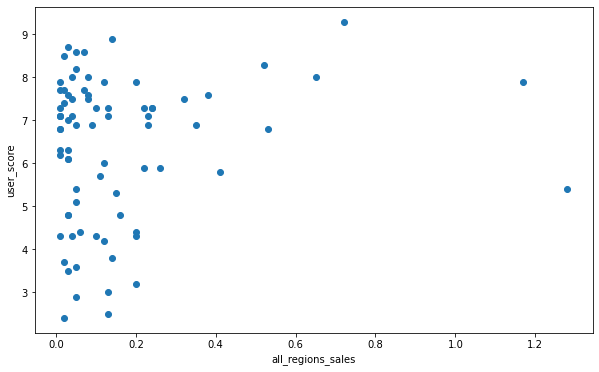

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x =  ps4_rates_sales['all_regions_sales'], y = ps4_rates_sales['user_score'])
plt.xlabel("all_regions_sales")
plt.ylabel("user_score")
plt.show()

продажи от оценок пользователей не зависят,что подтверждает этот график.

#### critic_score

In [38]:
df.query('platform=="PC"')['year_of_release'].unique()

array([2015., 2016.])

учтем при отборе заглушки которые установили ранее

In [39]:

ps4_rates_sales = df.query('platform=="PS4" & critic_score!=-999.0 & user_score!=-999.0')[['all_regions_sales','critic_score']]
ps4_rates_sales.corr()



,all_regions_sales,critic_score
all_regions_sales,1.000000,0.392074
critic_score,0.392074,1.000000


Отзывы критиков влияют гораздо сильнее на продажи. Именно поэтому, часто игры выдают для составления обзоров критикам на этапе завершения.

построим график, показывающий зависимость количества проданных копий игр от оценок

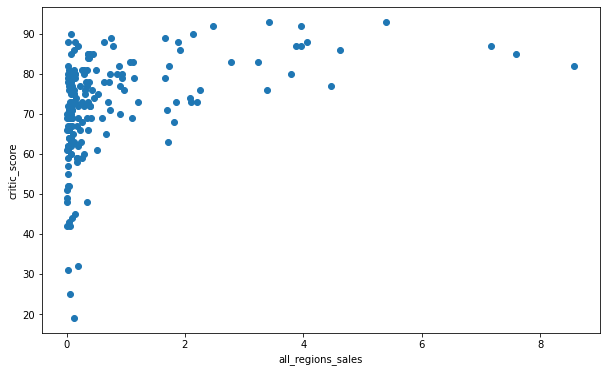

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x =  ps4_rates_sales['all_regions_sales'], y = ps4_rates_sales['critic_score'])
plt.xlabel("all_regions_sales")
plt.ylabel("critic_score")
plt.show()

На графике видно, что зависимость есть - гораздо больше игр с рейтингом 70 и выше продаются в разы больше. Есть определенная связь.

### 3DS Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.  Сформулируйте выводы.

Выберем для исследования платформу 3DS

#### user_score

учтем при отборе заглушки которые установили ранее

In [41]:

ps4_rates_sales = df.query('platform=="3DS" & critic_score!=-999.0 & user_score!=-999.0')[['all_regions_sales','user_score']]
ps4_rates_sales.corr()

,all_regions_sales,user_score
all_regions_sales,1.000000,0.240477
user_score,0.240477,1.000000


продажи от оценок пользователей не зависят

построим график, показывающий зависимость количества проданных копий игр от оценок пользователей

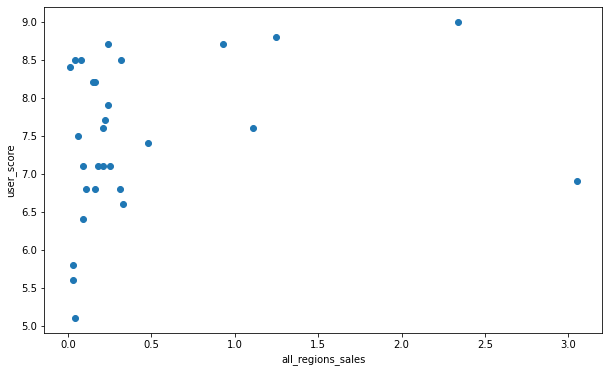

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x =  ps4_rates_sales['all_regions_sales'], y = ps4_rates_sales['user_score'])
plt.xlabel("all_regions_sales")
plt.ylabel("user_score")
plt.show()

продажи от оценок пользователей не зависят,что подтверждает этот график.

#### critic_score

In [43]:
df.query('platform=="3DS"')['year_of_release'].unique()

array([2016., 2015.])

учтем при отборе заглушки которые установили ранее

In [44]:

ps4_rates_sales = df.query('platform=="3DS" & critic_score!=-999.0 & user_score!=-999.0')[['all_regions_sales','critic_score']]
ps4_rates_sales.corr()



,all_regions_sales,critic_score
all_regions_sales,1.000000,0.177575
critic_score,0.177575,1.000000


Отзывы критиков влияют гораздо сильнее на продажи. Именно поэтому, часто игры выдают для составления обзоров критикам на этапе завершения.

построим график, показывающий зависимость количества проданных копий игр от оценок

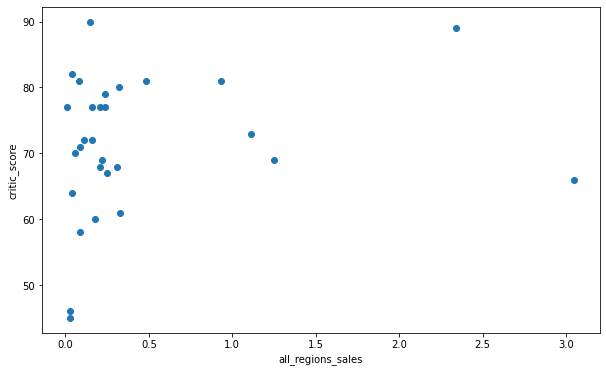

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x =  ps4_rates_sales['all_regions_sales'], y = ps4_rates_sales['critic_score'])
plt.xlabel("all_regions_sales")
plt.ylabel("critic_score")
plt.show()

На графике видно, что зависимость есть - гораздо больше игр с рейтингом 70 и выше продаются в разы больше. Есть определенная связь.

### Соотнесите выводы с продажами игр на других платформах.


ПО проведенным исследования можно сделать вывод, что пользовательский рейтинг не оказывает влияние на продажи, в отличие от отзывов критиков, которые оказывают влияние от слабого до умеренного 

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Создадим группировку в зависимости от жанра игры:

,all_regions_sales
genre,
Adventure,0.030
Puzzle,0.030
Strategy,0.050
Racing,0.055
Misc,0.060
Action,0.060
Fighting,0.090
Platform,0.100
Simulation,0.100


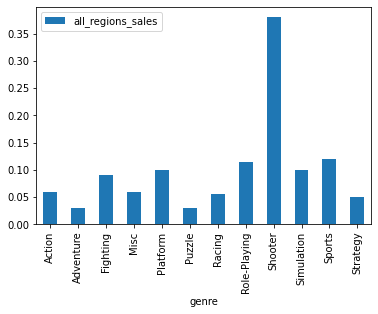

In [46]:
group_sales_genre = df.query('platform in @all_best_sales_platform & year_of_release>2013').\
pivot_table( index='genre',values = 'all_regions_sales',aggfunc = 'median').fillna(0)
group_sales_genre.plot(legend = True, kind='bar')
display (group_sales_genre.sort_values(by='all_regions_sales'))

Исходя из приведенных данных можно сказать, что самый популярный (по продажам) жанр это Shooter.Sports
Далее RPG

### Шаг 4. Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.

сгруппируем и подсчитаем данные:

In [47]:
# 
region_columns = ['na_sales','eu_sales','jp_sales','other_sales']
for region in region_columns:
    ax = df.query('year_of_release>2013').pivot_table(index = 'platform', values = region, aggfunc = 'sum').sort_values(by=region,ascending=False ).head(5)
    all_sales_region = ax[ax.columns[0]].sum()
    ax['share_sales']=ax[ax.columns[0]] / all_sales_region
    display (ax)


,na_sales,share_sales
platform,,
PS4,63.86,0.451690
XOne,50.30,0.355779
3DS,10.31,0.072924
WiiU,8.86,0.062668
X360,8.05,0.056939


,eu_sales,share_sales
platform,,
PS4,83.54,0.616850
XOne,28.10,0.207487
PC,9.10,0.067193
3DS,7.39,0.054567
PS3,7.30,0.053902


,jp_sales,share_sales
platform,,
3DS,23.55,0.443503
PS4,12.05,0.226930
PSV,8.41,0.158380
PS3,4.97,0.093597
WiiU,4.12,0.077589


,other_sales,share_sales
platform,,
PS4,28.70,0.682521
XOne,7.71,0.183353
PS3,2.49,0.059215
3DS,1.67,0.039715
WiiU,1.48,0.035196


В северной Америке, продажи игр по платформам первые места разделяют  PS4 XOne (общий порядок -  PS4 XOne X360 3DS PS3)
В европе более популярна PS4, которая занимает почти половину рынка продажи
В Японии первое место занимает 3DS, далее с почти одинаковой долей рынка - PS4 PSV PS3.
В группе остальных стран, лидирует с большим отрывом PS4 (далее XOne, PS3 X360 3DS)
Таким образом, можно сказать, что Европа в игровых предпочтениях больше схожа с группой Другие страны.
Япония предпочитает свои особенные консоли( в том числе WiiU). А Северная америка находится гдето посередине.

#### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.

сгруппируем и подсчитаем данные:

In [48]:
# 
region_columns = ['na_sales','eu_sales','jp_sales','other_sales']
for region in region_columns:
    ax = df.query('year_of_release>2013').pivot_table(index = 'genre', values = region, aggfunc = 'sum').sort_values(by=region,ascending=False ).head(5)
    all_sales_region = ax[ax.columns[0]].sum()
    ax['share_sales']=ax[ax.columns[0]] / all_sales_region
    display (ax)


,na_sales,share_sales
genre,,
Shooter,48.18,0.360710
Action,33.68,0.252152
Sports,26.31,0.196975
Role-Playing,19.82,0.148387
Misc,5.58,0.041776


,eu_sales,share_sales
genre,,
Shooter,40.28,0.318042
Action,34.82,0.274931
Sports,27.82,0.219660
Role-Playing,17.21,0.135886
Racing,6.52,0.051480


,jp_sales,share_sales
genre,,
Action,23.05,0.504818
Role-Playing,13.41,0.293693
Shooter,3.79,0.083005
Misc,3.19,0.069864
Adventure,2.22,0.048620


,other_sales,share_sales
genre,,
Shooter,13.48,0.340748
Action,10.58,0.267442
Sports,8.55,0.216127
Role-Playing,5.38,0.135996
Fighting,1.57,0.039687


В северной Америке в равной степени популярны  Shooter Action
В Европе, примерно тоже самое(Action Shooter) но на первое место выходят Action
В ЯПонии Role-Playing Action
В других странах Action Shooter Sports
И здесь мы можем видеть схожесть интересов Европейского и геймера из Других стран. В небольшой степени на них похожи игроки Из Северной Америки, отличающиеся большей склонностью к Shooter. Япония и здесь совсем особенная страна, предпочитает на первом месте Role-Playing  и  лишь потом - Action


#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

сгруппируем и подсчитаем данные:

In [49]:
# 
region_columns = ['na_sales','eu_sales','jp_sales','other_sales']
for region in region_columns:
    ax = df.query('year_of_release>2013').pivot_table(index = 'rating', values = region, aggfunc = 'sum').sort_values(by=region,ascending=False ).head(5)

    all_sales_region = ax[ax.columns[0]].sum()
    ax['share_sales']=ax[ax.columns[0]] / all_sales_region
    display (ax)


,na_sales,share_sales
rating,,
M,47.03,0.309836
WITHOUT_RATE,37.44,0.246657
E,26.59,0.175176
T,22.86,0.150603
E10+,17.87,0.117728


,eu_sales,share_sales
rating,,
M,45.54,0.307827
WITHOUT_RATE,35.71,0.241382
E,34.83,0.235433
T,20.32,0.137353
E10+,11.54,0.078005


,jp_sales,share_sales
rating,,
WITHOUT_RATE,32.89,0.615918
T,7.70,0.144195
E,5.25,0.098315
M,4.29,0.080337
E10+,3.27,0.061236


,other_sales,share_sales
rating,,
M,14.24,0.317928
WITHOUT_RATE,11.13,0.248493
E,8.57,0.191337
T,6.85,0.152936
E10+,4.00,0.089306


Здесь все страны похожи(M  E T E10+), кроме японии, у которой 
рейтинги Т и М предпочитаемы в обратном порядке (T E M E10+)

<div class="alert alert-info">
v2. Исправлено. 

    WIKI:
    
        Для определения рейтинга издатель присылает в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры.

        На веб-сайте ESRB сообщается, что затем рецензенты независимо оценивают продукт и определяют рейтинг. Оценкой рейтинга занимаются многие люди разных возрастов и слоёв общества. Это могут быть бывшие школьные учителя, родители, профессионалы и различные работники из других сфер деятельности, не связанные с игровой индустрией. Если рецензенты сходятся в оценке, то к рейтингу добавляют краткие описания и ESRB уведомляет издателя о своём решении.

        Когда игра готова к продаже, издатель отправляет копии финальной версии в ESRB. Подвергается осмотру упаковка игры, а предоставленные издателем сведения о содержании игры обычно проверяются путём её тестирования. Если игра оказывается более жёсткой, чем было представлено в видеоролике, или покупатели высказываются о несоответствии рейтинга и содержимого продукта, к издателю могут быть применены различные санкции.
    

На основе вышеприведенного, могу предположить, что либо были обстоятельства, по которым игры не получили рейтинговую оценку. Но тогда бы у них, скорее всего, был рейтинг «RP» («Rating Pending») — «Рейтинг ожидается».
    
Либо, что более вероятно, судя по достаточно высоким показателям особенно в Японии, игры вошли в другие категории (например AO Adults Only 18+).
    
</div>

### Шаг 5. Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные.

пользовательские рейтинги платформ Xbox One

In [50]:
#

user_rates_xboxone = df.query('platform =="XOne" & user_score != -999')['user_score']
user_rates_xboxone.mean()

6.542148760330578

пользовательские рейтинги платформ PC

In [51]:
#
user_rates_pc = df.query('platform =="PC" & user_score != -999')['user_score']
user_rates_pc.mean()

6.29642857142857

Нужен статистический тест, который сравнивает средние двух множеств

In [52]:


alpha = .05 # критический уровень статистической значимости

# 
results = st.ttest_ind(user_rates_xboxone, user_rates_pc)
print('p-значение:',results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу. То есть, все говорит в пользу гипотезы, что средние пользовательские рейтинги платформ одинаковые.


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза - Средние пользовательские жанров Action и Sports одинаковые. 

Альтернативная гипотеза - Средние пользовательские жанров Action и Sports разные.

Средние пользовательские рейтинги жанров Action

In [53]:
#

user_rates_action = df.query('genre =="Action" & user_score != -999')['user_score']
user_rates_action.mean()

6.808290155440415

Средние пользовательские рейтинги жанров  Sports

In [54]:
#

user_rates_Sports = df.query('genre =="Sports" & user_score != -999')['user_score']
user_rates_Sports.mean()

5.198780487804878

Нужен статистический тест, который сравнивает средние двух множеств

In [55]:


alpha = .05 # критический уровень статистической значимости

# 
results = st.ttest_ind(user_rates_action, user_rates_Sports)
print('p-значение:',results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


Гипотеза о том, что средние Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые отвергнута.

## Вывод

Вывод.Исходя из цели проекта и согласно проведенным исследованиям можно сказать, что есть зависимость популярности и количества продаж от жанра.
Выборка данных продаж  по регионам показывает относительно стабильный интерес кигровой индустрии в Японии и значительный рост на протяжении исследуемого периода в других регионах.
Для ряда платформ с очень низкими продажами и кортким жизненным циклом нет смысла исследовать характеристики по причине слишком маленькой доли продаж, по сравнении с другими.
Средний жизненный цикл платформы 5-7 лет, при этом для проггноза в этой быстро меняющейся индустрии достаточно 2-3  лет назад.
При анализе выяснилось, что нет смысла рассматривать все годы исследуенмого периода, важны только последние данные.

Исходя из графиков, потенциально прибыльные платформы -  PS4 XOne PC.
Расположены в порядке убывания потенциала, посчитанного на основе процента продаж предыдущих периодов.
мы видим что среди лидеров по охвату рынка PS4, PSP, XBOX One. Их медианные значения продаж и диапазон  квартилей значительно превосходит остальные.
от пользовательских рейтингов  продажи не зависят.

critic_score - отзыв 70 и выше даёт хорошую гарантию высоких продаж

Исходя из приведенных данных можно сказать, что самый популярный (по продажам) жанр это Action. Далее RPG, Adventure,Sports

По данным пользователей и регионам можно сказать, что популярные жанры следующие:
В северной Америке, продажи игр по платформам первые места разделяют PS4 XOne (общий порядок - PS4 XOne X360 3DS PS3) В европе более популярна PS4, которая занимает почти половину рынка продажи В Японии первое место занимает 3DS, далее с почти одинаковой долей рынка - PS4 PSV PS3. В группе остальных стран, лидирует с большим отрывом PS4 (далее XOne, PS3 X360 3DS) Таким образом, можно сказать, что Европа в игровых предпочтениях больше схожа с группой Другие страны. Япония предпочитает свои особенные консоли( в том числе WiiU). А Северная америка находится гдето посередине.


В северной Америке в равной степени популярны Shooter Action В Европе, примерно тоже самое(Action Shooter) но на первое место выходят Action В ЯПонии Role-Playing Action В других странах Action Shooter Sports И здесь мы можем видеть схожесть интересов Европейского и геймера из Других стран. В небольшой степени на них похожи игроки Из Северной Америки, отличающиеся большей склонностью к Shooter. Япония и здесь совсем особенная страна, предпочитает на первом месте Role-Playing и лишь потом - Action

Относительно влияния рейтингов по регионам, можно сказать следующее:
Здесь все страны похожи(M E T E10+), кроме японии, у которой рейтинги Т и М предпочитаемы в обратном порядке (T E M E10+)

Согласно статистическим исследованиям можно сказать что все говорит в пользу гипотезы, что средние пользовательские рейтинги платформ разные.
Гипотеза же, о том, что средние Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)одинаковые не отвергнута.

Рекомендация общего характера это сконцентрировать рекламные компании на жанре Role-Playing в Японии и На жанрах Action Shooter в остальных. Стоит ориентироваться на платформы PS4 XOne в европе и Америке, и на 3DS в Японии. Стоит также уделить внимание на отзывы критиков и ориентироваться на относительно прибыльные рейтинги  М.